## Support Vector Machine implementation on 220 Band AVIRIS Hyperspectral Image of Indian Pine Test Site 3 

## Steps :
## --> 1. Load Dataset 
## --> 2. Data Preprocessing (Converting from 3D to 2D)
## --> 3. Data Cleaning (Removing 0 class) 
## --> 4. Normalization (Z Score Normalization)
## --> 5. Train Test Splitting (70% Train , 30% Test)
## --> 6. Apply Grid search on train dataset and Find best values for hyperparameter
## --> 7. Find Training Accuracy
## --> 8. Testing Accuracy

# 1. Load Dataset

### Import Library

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import math
%matplotlib inline

### read .lan file

In [2]:
#import the package
from spectral import *

In [3]:
data = open_image('D:\Academic Thesis Papers\Thesis Report 9\sample-data-master\92AV3C.lan')

In [4]:
data

	Data Source:   'D:\Academic Thesis Papers\Thesis Report 9\sample-data-master\92AV3C.lan'
	# Rows:            145
	# Samples:         145
	# Bands:           220
	Interleave:        BIL
	Quantization:  16 bits
	Data format:     int16

In [5]:
data.shape

(145, 145, 220)

In [6]:
data[:,:,:]

array([[[3172, 4142, 4506, ..., 1020, 1020, 1005],
        [3348, 4266, 4502, ..., 1029, 1020, 1000],
        [3687, 4266, 4421, ..., 1030, 1016, 1009],
        ...,
        [3341, 3890, 4320, ..., 1021, 1015, 1025],
        [3170, 4130, 4320, ..., 1024, 1020, 1011],
        [3172, 3890, 4316, ..., 1034, 1016, 1015]],

       [[3344, 4388, 4334, ..., 1030, 1006, 1015],
        [3515, 4264, 4592, ..., 1039, 1015, 1020],
        [3518, 4268, 4423, ..., 1026, 1015, 1020],
        ...,
        [3859, 4512, 4605, ..., 1035, 1015,  996],
        [3686, 4264, 4690, ..., 1012, 1020, 1014],
        [3512, 4268, 4597, ..., 1019, 1016, 1010]],

       [[3512, 4146, 4416, ..., 1029, 1025, 1010],
        [3344, 4389, 4416, ..., 1021, 1011, 1000],
        [3512, 4273, 4420, ..., 1033, 1010, 1014],
        ...,
        [3341, 4266, 4509, ..., 1025, 1010, 1005],
        [3344, 4262, 4496, ..., 1029, 1020, 1005],
        [3510, 4142, 4230, ..., 1025, 1011, 1010]],

       ...,

       [[3324, 3728, 400

### read ground truth data

In [7]:
ground_truth_data = open_image('D:\Academic Thesis Papers\Thesis Report 9\sample-data-master\92AV3GT.GIS').read_band(0)

In [8]:
ground_truth_data

array([[3, 3, 3, ..., 0, 0, 0],
       [3, 3, 3, ..., 0, 0, 0],
       [3, 3, 3, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int8)

# 2. Data Preprocessing (Converting from 3D to 2D)

### Prepare dataset by making the band number as features and pixel number as rows

In [9]:
dictionary = dict()
value = list()

for z in range(220):
    count = z + 1
    key = 'band_' + str(count)
    
    for x in range(145):
        for y in range(145):
            value.append(data[x,y,z])
    
    dictionary[key] = value
    value = list()
            
dictionary

{'band_1': [3172,
  3348,
  3687,
  3517,
  3514,
  3343,
  3343,
  3343,
  3346,
  3522,
  3858,
  3514,
  3343,
  3343,
  3343,
  3343,
  3343,
  3343,
  3346,
  3514,
  3341,
  3172,
  3343,
  3341,
  3167,
  3004,
  3514,
  3341,
  3170,
  3170,
  3170,
  3167,
  3002,
  3338,
  2996,
  3004,
  3514,
  3343,
  3346,
  3517,
  3517,
  3514,
  3348,
  3687,
  3514,
  3346,
  3514,
  3343,
  3346,
  3514,
  3343,
  3343,
  3343,
  3348,
  3687,
  3511,
  3172,
  3346,
  3514,
  3346,
  3519,
  3690,
  3690,
  3690,
  3693,
  3858,
  3517,
  3517,
  3511,
  3170,
  3175,
  3514,
  3343,
  3343,
  3341,
  3172,
  3341,
  3167,
  2999,
  3170,
  3162,
  2657,
  3170,
  3167,
  3002,
  3341,
  3172,
  3338,
  2999,
  3170,
  3167,
  2996,
  2999,
  3167,
  3002,
  3341,
  3178,
  3690,
  3687,
  3517,
  3517,
  3514,
  3343,
  3346,
  3511,
  3175,
  3514,
  3343,
  3343,
  3343,
  3341,
  3172,
  3343,
  3346,
  3511,
  3172,
  3341,
  3170,
  3178,
  3685,
  3343,
  3341,
  3175,
  3517

In [10]:
dictionary['band_1']

[3172,
 3348,
 3687,
 3517,
 3514,
 3343,
 3343,
 3343,
 3346,
 3522,
 3858,
 3514,
 3343,
 3343,
 3343,
 3343,
 3343,
 3343,
 3346,
 3514,
 3341,
 3172,
 3343,
 3341,
 3167,
 3004,
 3514,
 3341,
 3170,
 3170,
 3170,
 3167,
 3002,
 3338,
 2996,
 3004,
 3514,
 3343,
 3346,
 3517,
 3517,
 3514,
 3348,
 3687,
 3514,
 3346,
 3514,
 3343,
 3346,
 3514,
 3343,
 3343,
 3343,
 3348,
 3687,
 3511,
 3172,
 3346,
 3514,
 3346,
 3519,
 3690,
 3690,
 3690,
 3693,
 3858,
 3517,
 3517,
 3511,
 3170,
 3175,
 3514,
 3343,
 3343,
 3341,
 3172,
 3341,
 3167,
 2999,
 3170,
 3162,
 2657,
 3170,
 3167,
 3002,
 3341,
 3172,
 3338,
 2999,
 3170,
 3167,
 2996,
 2999,
 3167,
 3002,
 3341,
 3178,
 3690,
 3687,
 3517,
 3517,
 3514,
 3343,
 3346,
 3511,
 3175,
 3514,
 3343,
 3343,
 3343,
 3341,
 3172,
 3343,
 3346,
 3511,
 3172,
 3341,
 3170,
 3178,
 3685,
 3343,
 3341,
 3175,
 3517,
 3517,
 3517,
 3517,
 3519,
 3690,
 3693,
 3858,
 3519,
 3687,
 3522,
 3861,
 3687,
 3517,
 3514,
 3346,
 3514,
 3338,
 3002,
 3341,

### Prepare ground truth data as target data

In [11]:
ground_truth_data

array([[3, 3, 3, ..., 0, 0, 0],
       [3, 3, 3, ..., 0, 0, 0],
       [3, 3, 3, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int8)

In [12]:
ground_truth_data.shape

(145, 145)

In [13]:
# number of unique values and their count

diff = dict()

for i in range(145):
    for j in range(145):
        if ground_truth_data[i,j] not in diff:
            diff[ground_truth_data[i,j]] = 1
        else:
            diff[ground_truth_data[i,j]] = diff[ground_truth_data[i,j]] + 1
diff

{3: 834,
 0: 10659,
 15: 380,
 11: 2468,
 12: 614,
 5: 497,
 10: 968,
 14: 1294,
 16: 95,
 2: 1434,
 4: 234,
 8: 489,
 6: 747,
 9: 20,
 1: 54,
 7: 26,
 13: 212}

NB : So there are total 17 classes in this ground truth data

In [14]:
target = ground_truth_data.reshape(21025,)
target

array([3, 3, 3, ..., 0, 0, 0], dtype=int8)

In [15]:
print(target.shape)
print(target.ndim)

(21025,)
1


### making df

In [16]:
df = pd.DataFrame(dictionary)

In [17]:
df

band_1  band_2  band_3  band_4  band_5  band_6  band_7  band_8  band_9  \
0        3172    4142    4506    4279    4782    5048    5213    5106    5053   
1        3348    4266    4502    4426    4853    5249    5352    5353    5347   
2        3687    4266    4421    4498    5019    5293    5438    5427    5383   
3        3517    4258    4603    4493    4958    5234    5417    5355    5349   
4        3514    4018    4675    4417    4886    5117    5215    5096    5098   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
21020    3329    3987    4011    4023    4201    4377    4418    4248    4180   
21021    3494    4104    4024    3880    4210    4377    4413    4174    4229   
21022    3153    3864    4282    3889    4310    4372    4375    4208    4096   
21023    3155    4104    4109    4027    4139    4318    4413    4174    4140   
21024    3323    3860    4197    3952    4148    4279    4375    4225    3988   

       band_10  ...  band_211  band_212  band_213  band_214  band_215  \
0         4750  ...      1094      1090      1112      1090      1062   
1         5065  ...      1108      1104      1117      1091      1079   
2         5132  ...      1111      1114      1114      1100      1065   
3         5096  ...      1122      1108      1109      1109      1071   
4         4834  ...      1110      1107      1112      1094      1072   
...        ...  ...       ...       ...       ...       ...       ...   
21020     3838  ...      1013      1012      1018      1015      1011   
21021     3900  ...      1012      1014      1012      1024       998   
21022     3878  ...      1016      1015      1016      1021      1008   
21023     3933  ...      1005      1011      1008      1012      1014   
21024     3866  ...      1018      1014      1007      1015      1002   

       band_216  band_217  band_218  band_219  band_220  
0          1069      1057      1020      1020      1005  
1          1085      1064      1029      1020      1000  
2          1092      1061      1030      1016      1009  
3          1088      1060      1030      1006      1005  
4          1087      1052      1034      1019      1019  
...         ...       ...       ...       ...       ...  
21020      1001      1000      1009      1008      1009  
21021      1010      1006      1000      1000      1004  
21022      1019      1003      1008      1000      1009  
21023      1007      1011      1005      1003      1004  
21024      1010      1007      1004      1000      1000  

[21025 rows x 220 columns]

In [18]:
target

array([3, 3, 3, ..., 0, 0, 0], dtype=int8)

In [19]:
target.shape

(21025,)

In [20]:
df['target'] = target
df

band_1  band_2  band_3  band_4  band_5  band_6  band_7  band_8  band_9  \
0        3172    4142    4506    4279    4782    5048    5213    5106    5053   
1        3348    4266    4502    4426    4853    5249    5352    5353    5347   
2        3687    4266    4421    4498    5019    5293    5438    5427    5383   
3        3517    4258    4603    4493    4958    5234    5417    5355    5349   
4        3514    4018    4675    4417    4886    5117    5215    5096    5098   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
21020    3329    3987    4011    4023    4201    4377    4418    4248    4180   
21021    3494    4104    4024    3880    4210    4377    4413    4174    4229   
21022    3153    3864    4282    3889    4310    4372    4375    4208    4096   
21023    3155    4104    4109    4027    4139    4318    4413    4174    4140   
21024    3323    3860    4197    3952    4148    4279    4375    4225    3988   

       band_10  ...  band_212  band_213  band_214  band_215  band_216  \
0         4750  ...      1090      1112      1090      1062      1069   
1         5065  ...      1104      1117      1091      1079      1085   
2         5132  ...      1114      1114      1100      1065      1092   
3         5096  ...      1108      1109      1109      1071      1088   
4         4834  ...      1107      1112      1094      1072      1087   
...        ...  ...       ...       ...       ...       ...       ...   
21020     3838  ...      1012      1018      1015      1011      1001   
21021     3900  ...      1014      1012      1024       998      1010   
21022     3878  ...      1015      1016      1021      1008      1019   
21023     3933  ...      1011      1008      1012      1014      1007   
21024     3866  ...      1014      1007      1015      1002      1010   

       band_217  band_218  band_219  band_220  target  
0          1057      1020      1020      1005       3  
1          1064      1029      1020      1000       3  
2          1061      1030      1016      1009       3  
3          1060      1030      1006      1005       3  
4          1052      1034      1019      1019       3  
...         ...       ...       ...       ...     ...  
21020      1000      1009      1008      1009       0  
21021      1006      1000      1000      1004       0  
21022      1003      1008      1000      1009       0  
21023      1011      1005      1003      1004       0  
21024      1007      1004      1000      1000       0  

[21025 rows x 221 columns]

# 3. Data Cleaning (Removing 0 class) 

In [21]:
df = df[df['target']!=0]

In [22]:
df

band_1  band_2  band_3  band_4  band_5  band_6  band_7  band_8  band_9  \
0        3172    4142    4506    4279    4782    5048    5213    5106    5053   
1        3348    4266    4502    4426    4853    5249    5352    5353    5347   
2        3687    4266    4421    4498    5019    5293    5438    5427    5383   
3        3517    4258    4603    4493    4958    5234    5417    5355    5349   
4        3514    4018    4675    4417    4886    5117    5215    5096    5098   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
20763    3500    4242    4113    4045    4510    4811    4812    4719    4631   
20764    3329    4242    4290    4255    4520    4865    4918    4819    4908   
20765    3332    4238    4290    4183    4634    4919    5085    4977    4841   
20766    3503    4114    4295    4192    4643    4973    5052    4993    4912   
20767    3500    4122    4388    4335    4734    5017    5123    5090    5105   

       band_10  ...  band_212  band_213  band_214  band_215  band_216  \
0         4750  ...      1090      1112      1090      1062      1069   
1         5065  ...      1104      1117      1091      1079      1085   
2         5132  ...      1114      1114      1100      1065      1092   
3         5096  ...      1108      1109      1109      1071      1088   
4         4834  ...      1107      1112      1094      1072      1087   
...        ...  ...       ...       ...       ...       ...       ...   
20763     4512  ...      1068      1077      1062      1050      1056   
20764     4586  ...      1082      1101      1071      1057      1058   
20765     4625  ...      1091      1096      1076      1061      1067   
20766     4683  ...      1092      1102      1080      1066      1068   
20767     4806  ...      1108      1107      1085      1054      1080   

       band_217  band_218  band_219  band_220  target  
0          1057      1020      1020      1005       3  
1          1064      1029      1020      1000       3  
2          1061      1030      1016      1009       3  
3          1060      1030      1006      1005       3  
4          1052      1034      1019      1019       3  
...         ...       ...       ...       ...     ...  
20763      1039      1014      1008      1004      10  
20764      1054      1018      1004      1014      10  
20765      1042      1023      1018      1009      10  
20766      1041      1024      1018      1004      10  
20767      1054      1024      1014      1018      10  

[10366 rows x 221 columns]

In [23]:
x = df[df.columns[:-1]]
x

band_1  band_2  band_3  band_4  band_5  band_6  band_7  band_8  band_9  \
0        3172    4142    4506    4279    4782    5048    5213    5106    5053   
1        3348    4266    4502    4426    4853    5249    5352    5353    5347   
2        3687    4266    4421    4498    5019    5293    5438    5427    5383   
3        3517    4258    4603    4493    4958    5234    5417    5355    5349   
4        3514    4018    4675    4417    4886    5117    5215    5096    5098   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
20763    3500    4242    4113    4045    4510    4811    4812    4719    4631   
20764    3329    4242    4290    4255    4520    4865    4918    4819    4908   
20765    3332    4238    4290    4183    4634    4919    5085    4977    4841   
20766    3503    4114    4295    4192    4643    4973    5052    4993    4912   
20767    3500    4122    4388    4335    4734    5017    5123    5090    5105   

       band_10  ...  band_211  band_212  band_213  band_214  band_215  \
0         4750  ...      1094      1090      1112      1090      1062   
1         5065  ...      1108      1104      1117      1091      1079   
2         5132  ...      1111      1114      1114      1100      1065   
3         5096  ...      1122      1108      1109      1109      1071   
4         4834  ...      1110      1107      1112      1094      1072   
...        ...  ...       ...       ...       ...       ...       ...   
20763     4512  ...      1078      1068      1077      1062      1050   
20764     4586  ...      1084      1082      1101      1071      1057   
20765     4625  ...      1091      1091      1096      1076      1061   
20766     4683  ...      1089      1092      1102      1080      1066   
20767     4806  ...      1095      1108      1107      1085      1054   

       band_216  band_217  band_218  band_219  band_220  
0          1069      1057      1020      1020      1005  
1          1085      1064      1029      1020      1000  
2          1092      1061      1030      1016      1009  
3          1088      1060      1030      1006      1005  
4          1087      1052      1034      1019      1019  
...         ...       ...       ...       ...       ...  
20763      1056      1039      1014      1008      1004  
20764      1058      1054      1018      1004      1014  
20765      1067      1042      1023      1018      1009  
20766      1068      1041      1024      1018      1004  
20767      1080      1054      1024      1014      1018  

[10366 rows x 220 columns]

In [24]:
y = df['target']
y

0         3
1         3
2         3
3         3
4         3
         ..
20763    10
20764    10
20765    10
20766    10
20767    10
Name: target, Length: 10366, dtype: int8

# 4. Normalization (Z Score Normalization)

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standardized_data = scaler.fit_transform(x)
standardized_data

array([[-0.99941216, -0.03965201,  0.59470724, ..., -0.01866884,
         1.37825836, -0.49240662],
       [-0.16032365,  0.51299708,  0.57911994, ...,  0.76096016,
         1.37825836, -1.19913665],
       [ 1.45587525,  0.51299708,  0.26347706, ...,  0.8475856 ,
         0.80922416,  0.07297741],
       ...,
       [-0.23660442,  0.38820535, -0.24700709, ...,  0.24120749,
         1.09374126,  0.07297741],
       [ 0.57864635, -0.16444374, -0.22752296, ...,  0.32783293,
         1.09374126, -0.63375262],
       [ 0.56434371, -0.12878896,  0.13488182, ...,  0.32783293,
         0.52470706,  1.34509147]])

In [26]:
x = pd.DataFrame(data = standardized_data)
x

0         1         2         3         4         5         6    \
0     -0.999412 -0.039652  0.594707  0.081449  0.443507  0.289186  0.434580   
1     -0.160324  0.512997  0.579120  0.603528  0.647625  0.771559  0.728306   
2      1.455875  0.512997  0.263477  0.859241  1.124857  0.877153  0.910035   
3      0.645392  0.477342  0.972699  0.841483  0.949488  0.735561  0.865659   
4      0.631089 -0.592301  1.253271  0.571564  0.742496  0.454776  0.438807   
...         ...       ...       ...       ...       ...       ...       ...   
10361  0.564344  0.406033 -0.936745 -0.749616 -0.338463 -0.279583 -0.412786   
10362 -0.250907  0.406033 -0.247007 -0.003788 -0.309714 -0.149990 -0.188794   
10363 -0.236604  0.388205 -0.247007 -0.259501  0.018023 -0.020397  0.164099   
10364  0.578646 -0.164444 -0.227523 -0.227537  0.043897  0.109195  0.094366   
10365  0.564344 -0.128789  0.134882  0.280336  0.305513  0.214790  0.244398   

            7         8         9    ...       210       211       212  \
0      0.446528  0.366420  0.220573  ...  0.361217  0.305169  0.693852   
1      0.943601  0.911715  0.796904  ...  0.717917  0.664207  0.812562   
2      1.092522  0.978486  0.919489  ...  0.794352  0.920662  0.741336   
3      0.947626  0.915425  0.853623  ...  1.074616  0.766789  0.622626   
4      0.426404  0.449884  0.374261  ...  0.768874  0.741143  0.693852   
...         ...       ...       ...  ...       ...       ...       ...   
10361 -0.332287 -0.416282 -0.214878  ... -0.046439 -0.259033 -0.137120   
10362 -0.131043  0.097482 -0.079485  ...  0.106432  0.100004  0.432689   
10363  0.186923 -0.026786 -0.008130  ...  0.284782  0.330814  0.313979   
10364  0.219122  0.104901  0.097988  ...  0.233824  0.356460  0.456431   
10365  0.414329  0.462867  0.323032  ...  0.386696  0.766789  0.575142   

            213       214       215       216       217       218       219  
0      0.703629  0.364226  0.401313  0.831488 -0.018669  1.378258 -0.492407  
1      0.732592  1.000321  0.933663  1.164336  0.760960  1.378258 -1.199137  
2      0.993265  0.476478  1.166566  1.021687  0.847586  0.809224  0.072977  
3      1.253937  0.700982  1.033478  0.974137  0.847586 -0.613361 -0.492407  
4      0.819483  0.738399  1.000206  0.593739  1.194087  1.236000  1.486437  
...         ...       ...       ...       ...       ...       ...       ...  
10361 -0.107352 -0.084783 -0.031221 -0.024408 -0.538422 -0.328844 -0.633753  
10362  0.153320  0.177139  0.035323  0.688838 -0.191920 -0.897878  0.779707  
10363  0.298138  0.326808  0.334769  0.118241  0.241207  1.093741  0.072977  
10364  0.413993  0.513895  0.368041  0.070692  0.327833  1.093741 -0.633753  
10365  0.558811  0.064887  0.767303  0.688838  0.327833  0.524707  1.345091  

[10366 rows x 220 columns]

In [27]:
name = list()
for i in range (x.shape[1]):
    name.append('PC'+str(i+1))
name

['PC1',
 'PC2',
 'PC3',
 'PC4',
 'PC5',
 'PC6',
 'PC7',
 'PC8',
 'PC9',
 'PC10',
 'PC11',
 'PC12',
 'PC13',
 'PC14',
 'PC15',
 'PC16',
 'PC17',
 'PC18',
 'PC19',
 'PC20',
 'PC21',
 'PC22',
 'PC23',
 'PC24',
 'PC25',
 'PC26',
 'PC27',
 'PC28',
 'PC29',
 'PC30',
 'PC31',
 'PC32',
 'PC33',
 'PC34',
 'PC35',
 'PC36',
 'PC37',
 'PC38',
 'PC39',
 'PC40',
 'PC41',
 'PC42',
 'PC43',
 'PC44',
 'PC45',
 'PC46',
 'PC47',
 'PC48',
 'PC49',
 'PC50',
 'PC51',
 'PC52',
 'PC53',
 'PC54',
 'PC55',
 'PC56',
 'PC57',
 'PC58',
 'PC59',
 'PC60',
 'PC61',
 'PC62',
 'PC63',
 'PC64',
 'PC65',
 'PC66',
 'PC67',
 'PC68',
 'PC69',
 'PC70',
 'PC71',
 'PC72',
 'PC73',
 'PC74',
 'PC75',
 'PC76',
 'PC77',
 'PC78',
 'PC79',
 'PC80',
 'PC81',
 'PC82',
 'PC83',
 'PC84',
 'PC85',
 'PC86',
 'PC87',
 'PC88',
 'PC89',
 'PC90',
 'PC91',
 'PC92',
 'PC93',
 'PC94',
 'PC95',
 'PC96',
 'PC97',
 'PC98',
 'PC99',
 'PC100',
 'PC101',
 'PC102',
 'PC103',
 'PC104',
 'PC105',
 'PC106',
 'PC107',
 'PC108',
 'PC109',
 'PC110',
 'PC111'

In [28]:
x.columns = name
x

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0     -0.999412 -0.039652  0.594707  0.081449  0.443507  0.289186  0.434580   
1     -0.160324  0.512997  0.579120  0.603528  0.647625  0.771559  0.728306   
2      1.455875  0.512997  0.263477  0.859241  1.124857  0.877153  0.910035   
3      0.645392  0.477342  0.972699  0.841483  0.949488  0.735561  0.865659   
4      0.631089 -0.592301  1.253271  0.571564  0.742496  0.454776  0.438807   
...         ...       ...       ...       ...       ...       ...       ...   
10361  0.564344  0.406033 -0.936745 -0.749616 -0.338463 -0.279583 -0.412786   
10362 -0.250907  0.406033 -0.247007 -0.003788 -0.309714 -0.149990 -0.188794   
10363 -0.236604  0.388205 -0.247007 -0.259501  0.018023 -0.020397  0.164099   
10364  0.578646 -0.164444 -0.227523 -0.227537  0.043897  0.109195  0.094366   
10365  0.564344 -0.128789  0.134882  0.280336  0.305513  0.214790  0.244398   

            PC8       PC9      PC10  ...     PC211     PC212     PC213  \
0      0.446528  0.366420  0.220573  ...  0.361217  0.305169  0.693852   
1      0.943601  0.911715  0.796904  ...  0.717917  0.664207  0.812562   
2      1.092522  0.978486  0.919489  ...  0.794352  0.920662  0.741336   
3      0.947626  0.915425  0.853623  ...  1.074616  0.766789  0.622626   
4      0.426404  0.449884  0.374261  ...  0.768874  0.741143  0.693852   
...         ...       ...       ...  ...       ...       ...       ...   
10361 -0.332287 -0.416282 -0.214878  ... -0.046439 -0.259033 -0.137120   
10362 -0.131043  0.097482 -0.079485  ...  0.106432  0.100004  0.432689   
10363  0.186923 -0.026786 -0.008130  ...  0.284782  0.330814  0.313979   
10364  0.219122  0.104901  0.097988  ...  0.233824  0.356460  0.456431   
10365  0.414329  0.462867  0.323032  ...  0.386696  0.766789  0.575142   

          PC214     PC215     PC216     PC217     PC218     PC219     PC220  
0      0.703629  0.364226  0.401313  0.831488 -0.018669  1.378258 -0.492407  
1      0.732592  1.000321  0.933663  1.164336  0.760960  1.378258 -1.199137  
2      0.993265  0.476478  1.166566  1.021687  0.847586  0.809224  0.072977  
3      1.253937  0.700982  1.033478  0.974137  0.847586 -0.613361 -0.492407  
4      0.819483  0.738399  1.000206  0.593739  1.194087  1.236000  1.486437  
...         ...       ...       ...       ...       ...       ...       ...  
10361 -0.107352 -0.084783 -0.031221 -0.024408 -0.538422 -0.328844 -0.633753  
10362  0.153320  0.177139  0.035323  0.688838 -0.191920 -0.897878  0.779707  
10363  0.298138  0.326808  0.334769  0.118241  0.241207  1.093741  0.072977  
10364  0.413993  0.513895  0.368041  0.070692  0.327833  1.093741 -0.633753  
10365  0.558811  0.064887  0.767303  0.688838  0.327833  0.524707  1.345091  

[10366 rows x 220 columns]

# 5. Train Test Splitting (70% Train , 30% Test)

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=42)

In [30]:
X_train

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
693  -1.838501 -1.202889 -0.823737 -1.030189 -0.973814 -0.788355 -0.900919   
2533 -0.141253 -0.044109  0.972699  0.628389  0.621751  0.675564  0.850867   
6123  0.759813  0.432774  0.205025  0.532497  0.225016 -0.010798  0.014067   
982  -1.881409 -0.619042 -1.170555 -1.310762 -1.183681 -1.400322 -1.226342   
3497 -0.126951  1.578184  1.331207  1.118505  1.127732  1.280331  1.237571   
...        ...       ...       ...       ...       ...       ...       ...   
5734 -1.662101 -0.102048  0.138779  0.269682  0.397509  0.363581  0.489522   
5191  0.755046  0.954225  0.532358  0.290991  0.409009  0.217189  0.381752   
5390 -0.050670 -0.164444  0.540152 -0.227537  0.236515  0.375581  0.379639   
860  -1.886176 -1.795650 -1.544650 -1.033741 -1.379174 -1.316326 -1.340451   
7270 -0.904061 -0.142160  0.551842  0.077898  0.443507  0.226789  0.320471   

           PC8       PC9      PC10  ...     PC211     PC212     PC213  \
693  -0.897784 -0.935610 -0.944897  ... -1.371324 -0.951464 -1.252997   
2533  0.770531  0.605682  0.588327  ...  0.590524  0.535979  0.646368   
6123  0.038002  0.095628  0.092499  ... -0.199311 -0.207742 -0.208347   
982  -1.088966 -1.265755 -1.168111  ... -1.345845 -1.387438 -1.371708   
3497  1.209244  1.236295  1.311029  ...  1.023659  1.202763  1.239919   
...        ...       ...       ...  ...       ...       ...       ...   
5734  0.458603  0.433191  0.458424  ...  0.743395  0.715498  0.622626   
5191  0.438478  0.344163  0.509653  ...  0.310260  0.176941  0.219011   
5390  0.211072  0.329325  0.357795  ...  0.616003  0.407751  0.622626   
860  -1.370708 -1.410425 -1.422429  ... -1.524195 -1.618248 -1.514160   
7270  0.221134  0.370130  0.253506  ...  0.565046  0.689852  0.598884   

         PC214     PC215     PC216     PC217     PC218     PC219     PC220  
693  -1.207969 -0.758295 -1.195735 -1.070502 -0.451796  0.524707 -0.492407  
2533  0.529847  0.177139  0.334769  0.641289  1.194087  0.524707 -0.633753  
6123 -0.194243 -0.384122 -0.230852 -0.690104 -0.625047  0.382449  0.779707  
982  -1.410714 -1.618895 -1.561726 -1.546000 -0.798298 -1.466913 -1.905867  
3497  0.877410  1.187408  1.100022  0.974137  1.194087 -0.186586  0.638361  
...        ...       ...       ...       ...       ...       ...       ...  
5734  0.819483  0.513895  0.368041  0.260891  0.241207  0.524707  0.779707  
5191  0.558811  0.551312  0.035323  0.023142 -0.105294 -0.897878  0.779707  
5390  0.442956  0.177139  0.234954  0.118241  0.674335 -0.897878 -0.633753  
860  -1.410714 -1.244721 -1.362095 -1.308251 -1.664552  0.524707 -0.633753  
7270  0.558811  0.700982  0.634216  0.736388  0.587709  0.524707  0.921053  

[7256 rows x 220 columns]

In [31]:
X_test

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
1803  -0.231837  1.065646  0.333620  0.607080  0.788494  0.658765  0.747324   
321   -2.653751 -1.702056 -1.248491 -0.774477 -1.198056 -1.198733 -1.247473   
7316  -0.069740  0.419403  0.914247  1.107850  0.799994  0.764359  0.827623   
8064   0.678765 -0.730463 -0.897777 -0.241743 -0.625952 -0.416376 -0.516329   
10054 -0.284280 -0.717093  0.805136  0.248372  0.196267  0.097196  0.172552   
...         ...       ...       ...       ...       ...       ...       ...   
3668  -0.126951  0.455058  0.629779  0.337161  0.633250  0.560371  0.487409   
5802   0.783651  0.994337  0.867485  0.550255  0.753996  0.713962  0.783247   
5900  -0.031600  0.414946  0.851898 -0.220433  0.380260  0.257987  0.398657   
10325  0.559576 -0.128789  0.134882  0.241269  0.210641  0.099596  0.083800   
6857   0.707370 -1.269742 -0.601618 -0.763822 -0.841569 -0.805154 -0.750887   

            PC8       PC9      PC10  ...     PC211     PC212     PC213  \
1803   0.939576  0.735514  0.650534  ...  0.692438  0.664207  0.503915   
321   -1.167451 -1.197129 -1.265082  ... -1.626109 -1.566957 -1.656613   
7316   0.989887  0.844944  0.935956  ...  0.972702  0.946308  0.836304   
8064  -0.539569 -0.419991 -0.617395  ... -0.377661 -0.489844 -0.208347   
10054  0.265408  0.251426  0.189469  ... -0.046439  0.356460  0.432689   
...         ...       ...       ...  ...       ...       ...       ...   
3668   0.462627  0.670598  0.591987  ...  0.717917  0.587270  0.836304   
5802   0.879203  1.106463  0.978037  ...  1.202009  1.151472  0.860046   
5900   0.460615  0.516655  0.493187  ...  0.641481  0.587270  0.527657   
10325  0.174848  0.307068  0.200447  ...  0.335739  0.279523  0.361463   
6857  -0.829361 -0.876259 -0.855246  ... -1.014624 -1.156628 -1.205513   

          PC214     PC215     PC216     PC217     PC218     PC219     PC220  
1803   0.587774  0.962903  0.933663  0.926587 -0.018669  1.378258  1.486437  
321   -1.584496 -1.431808 -1.362095 -1.355801 -1.318051 -0.755620 -1.199137  
7316   1.224974  0.888069  1.100022  1.164336  0.760960  0.524707  0.214323  
8064  -0.281134 -0.683461 -0.330667 -0.404806 -0.625047  1.093741 -1.199137  
10054  0.182284  0.663565  0.800575  0.308440 -0.451796  0.382449  0.638361  
...         ...       ...       ...       ...       ...       ...       ...  
3668   0.761556  0.663565  1.066750  1.069236  0.760960  1.236000  0.779707  
5802   1.051192  1.037738  1.066750  0.736388  0.241207  1.662775  0.214323  
5900   0.327102  0.663565  0.501129  0.260891  0.674335  0.382449  0.638361  
10325  0.298138  0.251973  0.501129  0.070692  0.674335 -0.755620 -0.633753  
6857  -1.381750 -1.020217 -1.262279 -1.118052 -1.404676 -1.466913 -0.492407  

[3110 rows x 220 columns]

In [32]:
y_train

1284     14
5157     10
10408     5
1827     15
6454     10
         ..
9663     10
8789     10
9082     10
1575     14
12520    11
Name: target, Length: 7256, dtype: int8

In [33]:
y_test

3395     12
651      15
12651    11
14723     6
19474     3
         ..
6685      4
9785     11
9950     10
20335    10
11713     5
Name: target, Length: 3110, dtype: int8

# 6. Apply Grid search on training dataset and Find best values for hyperparameter

In [34]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV, train_test_split

In [35]:
model = svm.SVC()

In [36]:
param_grid = {
    'C': [1,5,7,10,15,30,32,50,100,150,200],
    'kernel': ['rbf']
}

In [37]:
grid_search = GridSearchCV(model, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [1, 5, 7, 10, 15, 30, 32, 50, 100, 150, 200],
                         'kernel': ['rbf']},
             scoring='accuracy')

In [38]:
best_params = grid_search.best_params_
print(best_params)

{'C': 30, 'kernel': 'rbf'}


In [39]:
best_params['C']

30

In [40]:
print(grid_search.best_score_)

0.8840948038377505


In [41]:
# from sklearn import svm
# from sklearn.metrics import accuracy_score

In [42]:
# train_accuracy = 0
# best_train_accuracy = 0

# for train_C in np.arange(1,50,9):
#     for train_gamma in np.arange(0.001,0.1,0.005):
        
#         model = svm.SVC(kernel='rbf',C=train_C, gamma=train_gamma)
#         model.fit(X_train,y_train)
#         y_pred = model.predict(X_train)
#         train_accuracy = accuracy_score(y_train, y_pred)

#         if train_accuracy > best_train_accuracy:
#             best_train_accuracy = train_accuracy
#             best_train_C = train_C
#             best_train_gamma = train_gamma
        
#         print('Current C : ',train_C,'Current gamma : ',train_gamma,'Current Accuracy : ',train_accuracy)
#         print('Current Best C : ',best_train_C,'Current Best gamma : ',best_train_gamma,'Current Best Accuracy : ',best_train_accuracy)
#         print('-------------------------------------------------------------------------------------------------------------')

due to no validation , the best_train_C and best_train_gamma ,  we have got from this manual grid search on only training dataset , aren't working well on testing dataset.

In [43]:
# print(best_train_C)
# print(best_train_gamma)
# print(best_train_accuracy)

# 8. Find Training Accuracy

In [44]:
from sklearn.metrics import accuracy_score
final_model = svm.SVC(kernel = 'rbf',C = best_params['C'])
final_model.fit(X_train,y_train)
y_pred = final_model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print('Training Accuracy :',accuracy)

Training Accuracy : 0.9869073869900772


# 9. Testing Accuracy

In [45]:
# accuracy and classification report 

from sklearn.metrics import classification_report
final_model = svm.SVC(kernel = 'rbf',C = best_params['C'])
final_model.fit(X_train,y_train)

y_pred = final_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Overall Testing Accuracy :',accuracy)


report = classification_report(y_test, y_pred,labels=sorted(y_test.unique()))
print('\nClassification Report:\n')
print(report)

Overall Testing Accuracy : 0.8855305466237942

Classification Report:

              precision    recall  f1-score   support

           1       1.00      0.69      0.81        16
           2       0.86      0.89      0.88       449
           3       0.89      0.82      0.85       267
           4       0.73      0.70      0.71        69
           5       0.88      0.95      0.91       149
           6       0.93      0.97      0.95       244
           7       1.00      0.80      0.89         5
           8       0.97      0.99      0.98       144
           9       0.67      0.80      0.73         5
          10       0.88      0.76      0.82       287
          11       0.85      0.90      0.88       725
          12       0.91      0.88      0.89       187
          13       0.96      1.00      0.98        54
          14       0.92      0.98      0.95       354
          15       0.92      0.61      0.73       124
          16       1.00      1.00      1.00        31

    accur

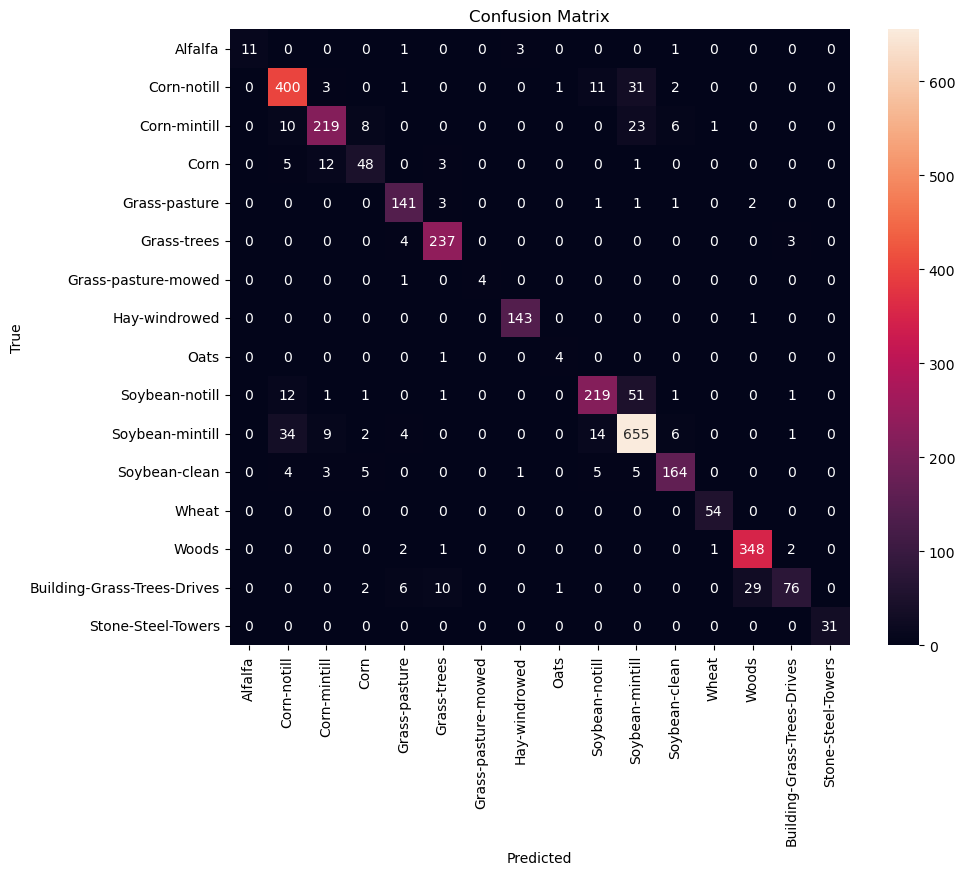

In [46]:
# confusion matrix
from sklearn.metrics import confusion_matrix

# Replace these with your actual ground truth and predicted labels
true_labels = y_test
predicted_labels = y_pred

# Create the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Define class labels (optional)
class_labels = ['Alfalfa','Corn-notill','Corn-mintill','Corn','Grass-pasture','Grass-trees','Grass-pasture-mowed','Hay-windrowed','Oats','Soybean-notill',
'Soybean-mintill','Soybean-clean','Wheat','Woods','Building-Grass-Trees-Drives','Stone-Steel-Towers']

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
# sns.set(font_scale=1.2)
# ns.set_style("whitegrid")
sns.heatmap(cm, annot=True, fmt="g", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# ------------------------------------End-----------------------------------------

In [47]:
sorted(y_test.unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

In [48]:
y_test.value_counts()

11    725
2     449
14    354
10    287
3     267
6     244
12    187
5     149
8     144
15    124
4      69
13     54
16     31
1      16
9       5
7       5
Name: target, dtype: int64

In [49]:
# classification report
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred,labels=sorted(y_test.unique()))
print(report)

              precision    recall  f1-score   support

           1       1.00      0.69      0.81        16
           2       0.86      0.89      0.88       449
           3       0.89      0.82      0.85       267
           4       0.73      0.70      0.71        69
           5       0.88      0.95      0.91       149
           6       0.93      0.97      0.95       244
           7       1.00      0.80      0.89         5
           8       0.97      0.99      0.98       144
           9       0.67      0.80      0.73         5
          10       0.88      0.76      0.82       287
          11       0.85      0.90      0.88       725
          12       0.91      0.88      0.89       187
          13       0.96      1.00      0.98        54
          14       0.92      0.98      0.95       354
          15       0.92      0.61      0.73       124
          16       1.00      1.00      1.00        31

    accuracy                           0.89      3110
   macro avg       0.90   

In [50]:
class_accuracies = {}
class_sample_counts = {}

# Calculate per-class accuracy and sample counts
for class_label in set(y_test):
    class_indices = y_test == class_label
    class_accuracy = accuracy_score(y_test[class_indices], y_pred[class_indices])
    class_sample_count = sum(class_indices)
    class_accuracies[class_label] = class_accuracy
    class_sample_counts[class_label] = class_sample_count

# Print per-class accuracies and sample counts
print("Per-Class Accuracies and Sample Counts:")
for class_label, class_accuracy in class_accuracies.items():
    class_samples = class_sample_counts[class_label]
    print(f"Class {class_label}: Accuracy = {class_accuracy:.2f}, Samples = {class_samples}")

Per-Class Accuracies and Sample Counts:
Class 1: Accuracy = 0.69, Samples = 16
Class 2: Accuracy = 0.89, Samples = 449
Class 3: Accuracy = 0.82, Samples = 267
Class 4: Accuracy = 0.70, Samples = 69
Class 5: Accuracy = 0.95, Samples = 149
Class 6: Accuracy = 0.97, Samples = 244
Class 7: Accuracy = 0.80, Samples = 5
Class 8: Accuracy = 0.99, Samples = 144
Class 9: Accuracy = 0.80, Samples = 5
Class 10: Accuracy = 0.76, Samples = 287
Class 11: Accuracy = 0.90, Samples = 725
Class 12: Accuracy = 0.88, Samples = 187
Class 13: Accuracy = 1.00, Samples = 54
Class 14: Accuracy = 0.98, Samples = 354
Class 15: Accuracy = 0.61, Samples = 124
Class 16: Accuracy = 1.00, Samples = 31
